Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


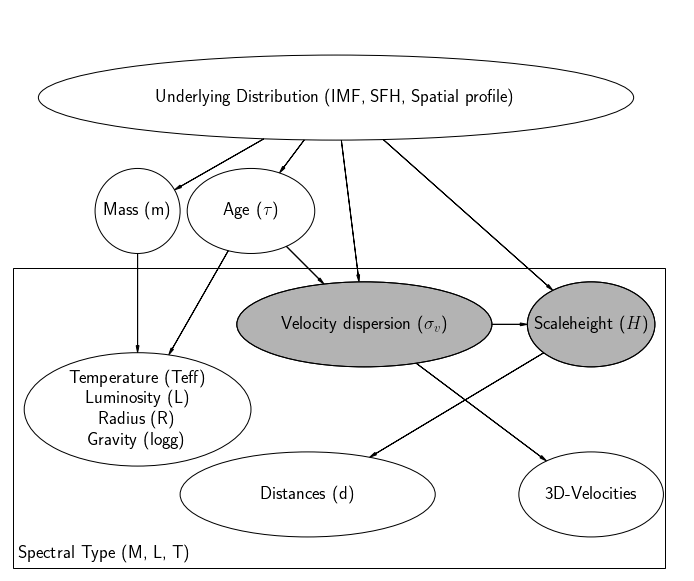

In [1]:
import daft
import popsims

from matplotlib import rc

#rc("font", family="serif", size=18)
import matplotlib as mpl 
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.titlesize'] = 14
rc("text", usetex=True)
%matplotlib inline





# Instantiate the PGM.
pgm = daft.PGM(shape=(12,10))
pgm.add_node("u", r" Underlying Distribution (IMF, SFH, Spatial profile)", 5, 11, scale=3, aspect=7, fontsize=18, 
             fixed=False)
# Hierarchical parameters.
pgm.add_node("m", r"Mass (m)", 1.5, 9, scale=3, aspect=1, fontsize=18, 
             fixed=False)
pgm.add_node("t", r"Age ($\tau$)", 3.5, 9,  scale=3, aspect=1.5, fontsize=18,
             fixed=False)
#pgm.add_node("theta", r"Galactic Structure", 6.5,10, scale=3, aspect=1.7, 
#             fontsize=18,fixed=False)

pgm.add_node("h", "Scaleheight ($H$)", 9.5,7, scale=3, aspect=1.5, observed=True, fontsize=18)
pgm.add_node("sigma", "Velocity dispersion ($\sigma_v$)", 5.5,7, scale=3, aspect=3, 
             observed=True, fontsize=18)
pgm.add_node("evol", "Temperature (Teff) \n  Luminosity (L) \n Radius (R) \n Gravity (logg)", 
             1.5, 5.5,scale=4, aspect=2,observed=False, fontsize=18)

pgm.add_node("d", "Distances (d)", 4.5,4, scale=3, aspect=3., observed=False, fontsize=18)
pgm.add_node("vel", "3D-Velocities", 9.5, 4, scale=3, aspect=1.7, observed=False, fontsize=18)

#gm.add_node("d", "Magnitude", 6.5,4, scale=2, aspect=2, observed=True)



pgm.add_edge("u", "t")
pgm.add_edge("u", "sigma")
pgm.add_edge("u", "h")
pgm.add_edge("u", "m")

pgm.add_edge("m", "evol")
pgm.add_edge("t", "evol")
pgm.add_edge("t", "sigma")
#pgm.add_edge("evol", "sigma")
#pgm.add_edge("theta", "h")
pgm.add_edge("h", "d")
pgm.add_edge('sigma', 'h')
pgm.add_edge('sigma', 'vel')


# And a plate.
pgm.add_plate([-0.7, 3, 11.5, 5.], label=r"Spectral Type (M, L, T) ", shift=-0.3, fontsize=18)
# Render and save.
pgm.render()

pgm.savefig(popsims.FIGURES+"pgm.pdf")
pgm.savefig(popsims.FIGURES+"pgm.png", dpi=150,  facecolor='white', transparent=False)